In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'C:/Users/harry/OneDrive/Documents/ML PROJECT/MLBookProjectDaniel.xlsx'

In [10]:
df = pd.read_excel(file_path)

In [11]:
df.head(10)

,bookID,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,12224,Sam Bass Warner,3.58,9780674842113,en-US,236,61,6,38097,Harvard University Press
1,16914,David E. Smith (Turgon of TheOneRing.net,3.58,9781593600112,eng,400,26,4,38083,Cold Spring Press
2,26012,Bret Easton Ellis,3.46,9782264031914,fre,537,56,5,36937,2018-10-01 00:00:00
3,28225,Nicholson Baker,3.84,9782264017697,fre,191,6,1,36117,2018-10-01 00:00:00
4,22128,James Wesley,3.63,9781563841552,eng,342,38,4,36175,Huntington House Publishers
5,31095,Robert M. Pirsig,3.58,9781403356208,en-GB,600,54,5,37635,1st Book Library
6,5478,George Orwell,4.18,9781421808321,eng,387,215,17,38534,1st World Library
7,31373,Elizabeth George,4.10,9780553575101,eng,718,10608,295,36831,Bantam Books
8,16285,Terry Deary,4.40,9780713659894,eng,62,5,0,37195,A & C Black
9,18843,Virginia Woolf,4.07,9780156028066,eng,216,244,13,37711,A Harvest Book


In [12]:
df = df.drop(columns=["bookID"])

In [13]:
df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_date
count,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000,11127.000000
mean,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498,36768.842995
std,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608,2998.495083
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000,4750.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000,35992.500000
50%,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000,37681.000000
75%,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000,38625.000000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000,43921.000000


In [14]:
df.isna().sum()

authors               0
average_rating        0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [15]:
print(df.columns)

Index(['authors', 'average_rating', 'isbn13', 'language_code', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')


In [16]:
publisher_avg_rating = df.groupby("publisher")["average_rating"].mean()
df["Publisher_Label"] = df["publisher"].map(publisher_avg_rating)
print(df.head())

                                    authors  average_rating         isbn13  \
0                           Sam Bass Warner            3.58  9780674842113   
1  David E. Smith (Turgon of TheOneRing.net            3.58  9781593600112   
2                         Bret Easton Ellis            3.46  9782264031914   
3                           Nicholson Baker            3.84  9782264017697   
4                              James Wesley            3.63  9781563841552   

  language_code    num_pages  ratings_count  text_reviews_count  \
0         en-US          236             61                   6   
1           eng          400             26                   4   
2           fre          537             56                   5   
3           fre          191              6                   1   
4           eng          342             38                   4   

   publication_date                    publisher  Publisher_Label  
0             38097     Harvard University Press          4.

In [17]:
publisher_avg_rating = df.groupby("authors")["average_rating"].mean()
df["Author_Label"] = df["authors"].map(publisher_avg_rating)
print(df.head())

                                    authors  average_rating         isbn13  \
0                           Sam Bass Warner            3.58  9780674842113   
1  David E. Smith (Turgon of TheOneRing.net            3.58  9781593600112   
2                         Bret Easton Ellis            3.46  9782264031914   
3                           Nicholson Baker            3.84  9782264017697   
4                              James Wesley            3.63  9781563841552   

  language_code    num_pages  ratings_count  text_reviews_count  \
0         en-US          236             61                   6   
1           eng          400             26                   4   
2           fre          537             56                   5   
3           fre          191              6                   1   
4           eng          342             38                   4   

   publication_date                    publisher  Publisher_Label  \
0             38097     Harvard University Press          4

In [18]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [19]:
import category_encoders as ce

# Create a binary encoder object
encoder = ce.BinaryEncoder(cols=['language_code'])

# Fit and transform the 'language_code' column
df = encoder.fit_transform(df)


print(df.head())

                                    authors  average_rating         isbn13  \
0                           Sam Bass Warner            3.58  9780674842113   
1  David E. Smith (Turgon of TheOneRing.net            3.58  9781593600112   
2                         Bret Easton Ellis            3.46  9782264031914   
3                           Nicholson Baker            3.84  9782264017697   
4                              James Wesley            3.63  9781563841552   

   language_code_0  language_code_1  language_code_2  language_code_3  \
0                0                0                0                0   
1                0                0                0                1   
2                0                0                0                1   
3                0                0                0                1   
4                0                0                0                1   

   language_code_4    num_pages  ratings_count  text_reviews_count  \
0                1    

In [20]:
df_processed = df.drop(columns=["authors","publisher"])

In [21]:
print(df_processed.head())

   average_rating         isbn13  language_code_0  language_code_1  \
0            3.58  9780674842113                0                0   
1            3.58  9781593600112                0                0   
2            3.46  9782264031914                0                0   
3            3.84  9782264017697                0                0   
4            3.63  9781563841552                0                0   

   language_code_2  language_code_3  language_code_4    num_pages  \
0                0                0                1          236   
1                0                1                0          400   
2                0                1                1          537   
3                0                1                1          191   
4                0                1                0          342   

   ratings_count  text_reviews_count  publication_date  Publisher_Label  \
0             61                   6             38097          4.10375   
1             

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df.columns

Index(['authors', 'average_rating', 'isbn13', 'language_code_0',
       'language_code_1', 'language_code_2', 'language_code_3',
       'language_code_4', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'Publisher_Label', 'Author_Label'],
      dtype='object')

In [24]:
df.head(15)

,authors,average_rating,isbn13,language_code_0,language_code_1,language_code_2,language_code_3,language_code_4,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Publisher_Label,Author_Label
0,Sam Bass Warner,3.58,9780674842113,0,0,0,0,1,236,61,6,38097,Harvard University Press,4.103750,3.580000
1,David E. Smith (Turgon of TheOneRing.net,3.58,9781593600112,0,0,0,1,0,400,26,4,38083,Cold Spring Press,3.560000,3.580000
2,Bret Easton Ellis,3.46,9782264031914,0,0,0,1,1,537,56,5,36937,2018-10-01 00:00:00,3.650000,3.594286
3,Nicholson Baker,3.84,9782264017697,0,0,0,1,1,191,6,1,36117,2018-10-01 00:00:00,3.650000,3.452500
4,James Wesley,3.63,9781563841552,0,0,0,1,0,342,38,4,36175,Huntington House Publishers,3.630000,3.630000
5,Robert M. Pirsig,3.58,9781403356208,0,0,1,0,0,600,54,5,37635,1st Book Library,3.580000,3.725000
6,George Orwell,4.18,9781421808321,0,0,0,1,0,387,215,17,38534,1st World Library,4.180000,4.150000
7,Elizabeth George,4.10,9780553575101,0,0,0,1,0,718,10608,295,36831,Bantam Books,3.878485,3.937500
8,Terry Deary,4.40,9780713659894,0,0,0,1,0,62,5,0,37195,A & C Black,4.400000,4.200000
9,Virginia Woolf,4.07,9780156028066,0,0,0,1,0,216,244,13,37711,A Harvest Book,4.070000,4.110455


In [25]:
bins = [0, 3, 4, 5]  # The intervals Luis defined
labels = [0, 1, 2]  # Class labels to each interval: 0 (low), 1 (medium), 2 (high)
df_processed['rating_class'] = pd.cut(df_processed['average_rating'], bins=bins, labels=labels, include_lowest=True)

In [26]:
df_processed.head(15)

,average_rating,isbn13,language_code_0,language_code_1,language_code_2,language_code_3,language_code_4,num_pages,ratings_count,text_reviews_count,publication_date,Publisher_Label,Author_Label,rating_class
0,3.58,9780674842113,0,0,0,0,1,236,61,6,38097,4.103750,3.580000,1
1,3.58,9781593600112,0,0,0,1,0,400,26,4,38083,3.560000,3.580000,1
2,3.46,9782264031914,0,0,0,1,1,537,56,5,36937,3.650000,3.594286,1
3,3.84,9782264017697,0,0,0,1,1,191,6,1,36117,3.650000,3.452500,1
4,3.63,9781563841552,0,0,0,1,0,342,38,4,36175,3.630000,3.630000,1
5,3.58,9781403356208,0,0,1,0,0,600,54,5,37635,3.580000,3.725000,1
6,4.18,9781421808321,0,0,0,1,0,387,215,17,38534,4.180000,4.150000,2
7,4.10,9780553575101,0,0,0,1,0,718,10608,295,36831,3.878485,3.937500,2
8,4.40,9780713659894,0,0,0,1,0,62,5,0,37195,4.400000,4.200000,2
9,4.07,9780156028066,0,0,0,1,0,216,244,13,37711,4.070000,4.110455,2


In [27]:
df_train, df_test = train_test_split(df_processed,test_size = 0.3)

In [28]:
len(df_processed)

11127

In [22]:
df_train.columns

Index(['average_rating', 'isbn13', 'language_code_0', 'language_code_1',
       'language_code_2', 'language_code_3', 'language_code_4', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date',
       'Publisher_Label', 'Author_Label', 'rating_class'],
      dtype='object')

In [38]:

# get the values of the columns for the training data and dropping the average rating for the rating class
X_train = df_train.loc[:,[ 'isbn13', 'language_code_0', 'language_code_1',
       'language_code_2', 'language_code_3', 'language_code_4', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date',
       'Publisher_Label', 'Author_Label']].values
y_train = df_train.rating_class.values

In [39]:
X_test = df_test.loc[:,[ 'isbn13', 'language_code_0', 'language_code_1',
       'language_code_2', 'language_code_3', 'language_code_4', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date',
       'Publisher_Label', 'Author_Label']].values
y_test = df_test.rating_class.values

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [41]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred = model.predict(X_test)

In [43]:
# Evaluate the Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the Classification Report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8448637316561844
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.59      0.71        37
           1       0.85      0.88      0.87      1891
           2       0.83      0.81      0.82      1411

    accuracy                           0.84      3339
   macro avg       0.86      0.76      0.80      3339
weighted avg       0.84      0.84      0.84      3339



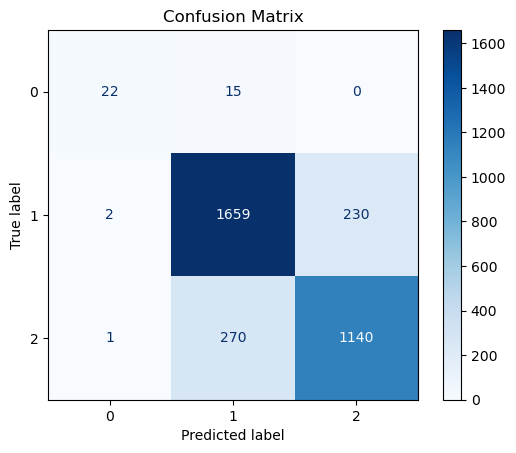

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

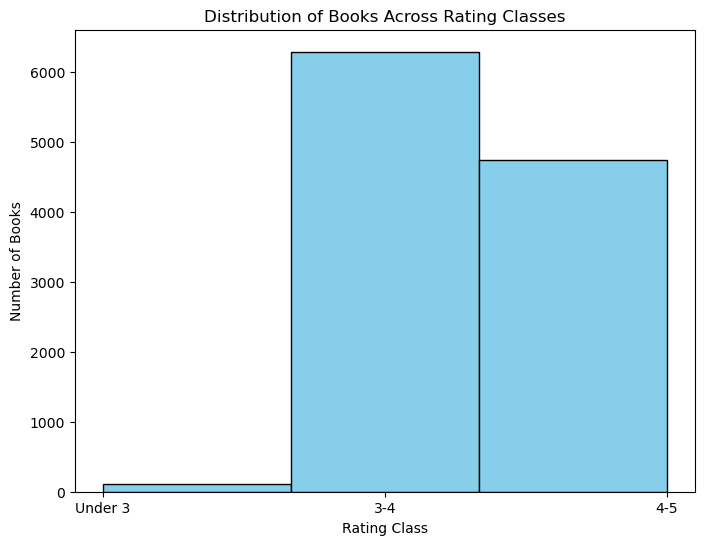

In [45]:

plt.figure(figsize=(8,6))
plt.hist(df_processed['rating_class'], bins=3, edgecolor='black', color='skyblue')

plt.title('Distribution of Books Across Rating Classes')
plt.xlabel('Rating Class')
plt.ylabel('Number of Books')
plt.xticks([0, 1, 2], ['Under 3', '3-4', '4-5'])
plt.show()


Data is heavily skewed, we have data imbalance with this slicing strategy. 
We can maybe try to group "under 3" and "between 3 and 4". So we would get a simple classification problem like "good" or "not good" but i don't know we lose granularity. 

We can also try to over sample the "under 3" class or to give it more weight. 

In [60]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


Importing SMOTE (Synthetic Minority Over-sampling Technique) to deal with the data imbalance. 

In [61]:

from sklearn.model_selection import train_test_split

In [73]:
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled_train, y_resampled_train)

RandomForestClassifier(random_state=42)

In [74]:
y_pred = model.predict(X_test)

In [1]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

NameError: name 'accuracy_score' is not defined

For class 0, precision went down and recall improved very slighltly. Overall i think this slicing is maybe not the way to go if we want to do classification. Maybe using other models like Gradient Boosting can improve the overall score. But basically the model is really good at predicting class 1 and 2 because the data is imbalanced. 